In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
companies = pd.read_csv("C:Downloads\DataSets\Companies.csv")
print(companies.head())     
X = companies.iloc[:,:-1].values
Y = companies.iloc[:,-1].values

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


<AxesSubplot:>

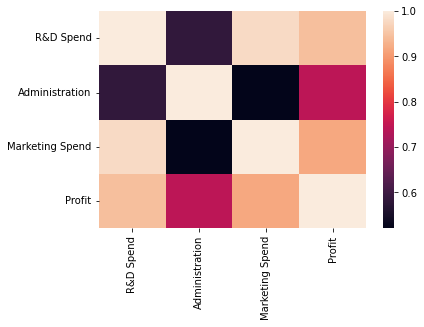

In [29]:
#Data Visualization
sns.heatmap(companies.corr())

In [33]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())

print(X[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [34]:
X = X[:,1:]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
Y_pred = model.predict(X_test)
Y_pred
print(len(Y_pred))

200


In [43]:
print(model.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [44]:
print(model.intercept_)

-51035.22972404407


In [46]:
from sklearn.metrics import r2_score
print(100*r2_score(Y_test,Y_pred))

91.12695892268829


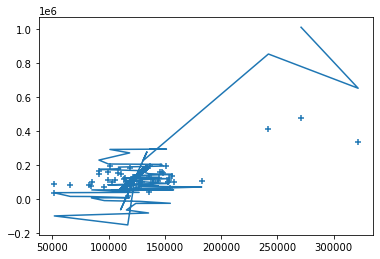

In [57]:
from matplotlib import pyplot as plt
plt.scatter(companies.Administration ,companies.Profit,marker="+")
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(companies[["Administration"]],companies[["Profit"]])
plt.plot(companies["Administration"],lr.predict(companies[["Profit"]]))
plt.show()